<a href="https://colab.research.google.com/github/masatoran/2024_02_isDefault/blob/master/TeamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도구 준비

In [ ]:
#기본적인 모듈
import pandas as pd
import numpy as np
#시각화 모듈
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno#결측값 시각화

#인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE#불균형 데이터 문제
from sklearn.model_selection import train_test_split#데이터분할
from sklearn.metrics import confusion_matrix,classification_report#혼동행렬
from sklearn.preprocessing import StandardScaler#표준화
from sklearn.preprocessing import MinMaxScaler#정규화
from scipy.stats import chi2_contingency#카이제곱검증
#from tensorflow.keras.metrics import F1Score#F1Score
from sklearn.metrics import f1_score

#로지스튁 회귀
from sklearn.linear_model import LogisticRegression
#다층 퍼셉트론
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
load_df = pd.read_csv('/content/drive/MyDrive/smu/artificial /teamProject/DATA/train.csv')

# EDA

In [ ]:
#데이터프레임의 정보와 구조 확인
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  object 
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  object 
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  object 
 9   loan_status        242150 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 18.5+ MB


## 컬럼 설명
- id 고객ID(인덱스로 사용)
- loan_amnt 대출 금액
- term 대출기간  
- interest_rate 금리
- grade 등급
- employment_length 근속 연수
- purpose 대출의 목적
- credit_score 신용 스코어
- application_type 대출시의 신청 방법
- loan_status 변제 상태(목적변수)

In [ ]:
load_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [ ]:
#기본 통계량
load_df.describe()

,id,loan_amnt,interest_rate,credit_score
count,242150.00000,242150.000000,242150.000000,242150.000000
mean,121074.50000,1520.389009,13.801496,683.575024
std,69902.82818,830.250197,4.588924,29.554795
min,0.00000,323.797279,5.704849,655.424269
25%,60537.25000,761.954545,10.876086,659.531106
50%,121074.50000,1212.680586,13.543833,678.672563
75%,181611.75000,2152.213330,17.172395,698.591960
max,242149.00000,3851.867974,27.980604,808.551641


In [ ]:
#기본 통계량 object
load_df.describe(include='object')

,term,grade,employment_length,purpose,application_type,loan_status
count,242150,242150,242150,242150,242150,242150
unique,2,27,11,9,2,2
top,3 years,C4,10 years,debt_consolidation,Individual,FullyPaid
freq,189887,18936,103339,160207,240368,199794


<Axes: >

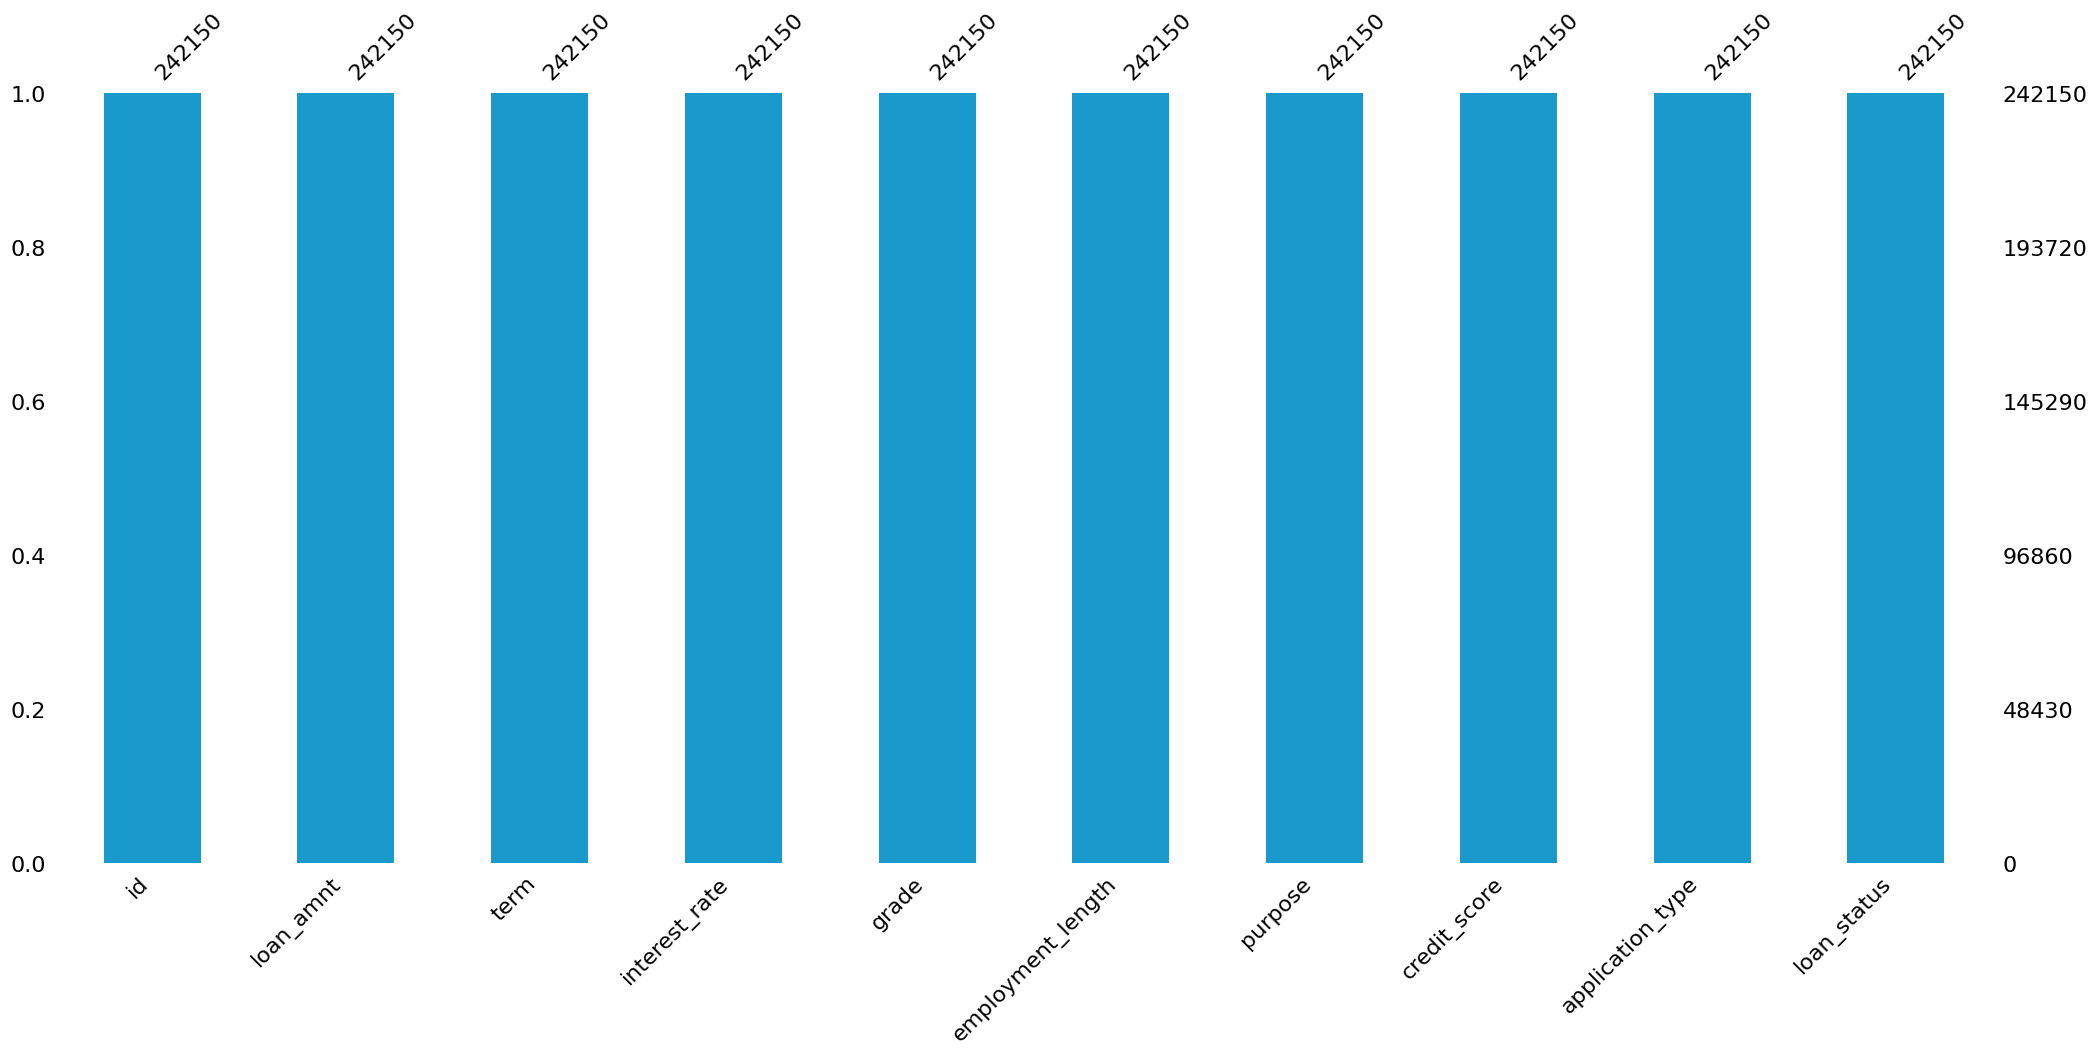

In [ ]:
#결측값이 있는지 확인
msno.bar(df=load_df.iloc[:, :], color=(0.1, 0.6, 0.8))

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'grade'),
  Text(1, 0, 'employment_length'),
  Text(2, 0, 'purpose'),
  Text(3, 0, 'term'),
  Text(4, 0, 'application_type'),
  Text(5, 0, 'loan_status')])

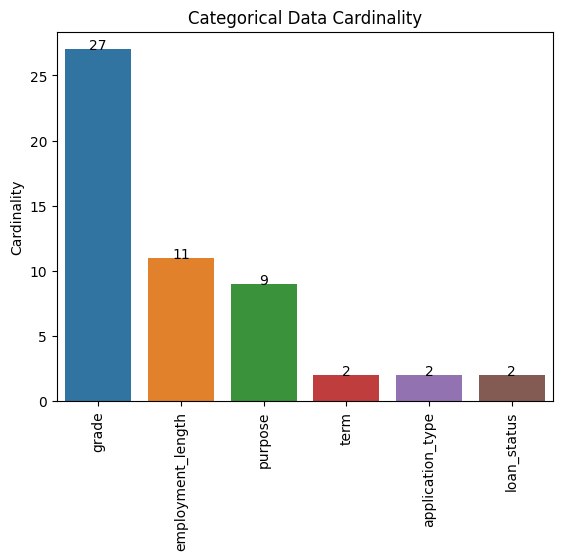

In [ ]:
# 각 범주형 컬럼에 몇개의 고유한 값이 존재하는지 시각화

data = load_df.select_dtypes('object')

data = data.nunique().sort_values(ascending = False)

g = sns.barplot(
    x = data.index ,
    y = data.values
)

for p in g.patches:
    g.text(
        p.get_x() + p.get_width() / 2 ,
        p.get_y() + p.get_height() ,
        f"{p.get_height():.0f}" ,
        ha = 'center'
    )

plt.title('Categorical Data Cardinality')
plt.ylabel('Cardinality')
plt.xticks(rotation=90)

<Axes: xlabel='loan_status', ylabel='count'>

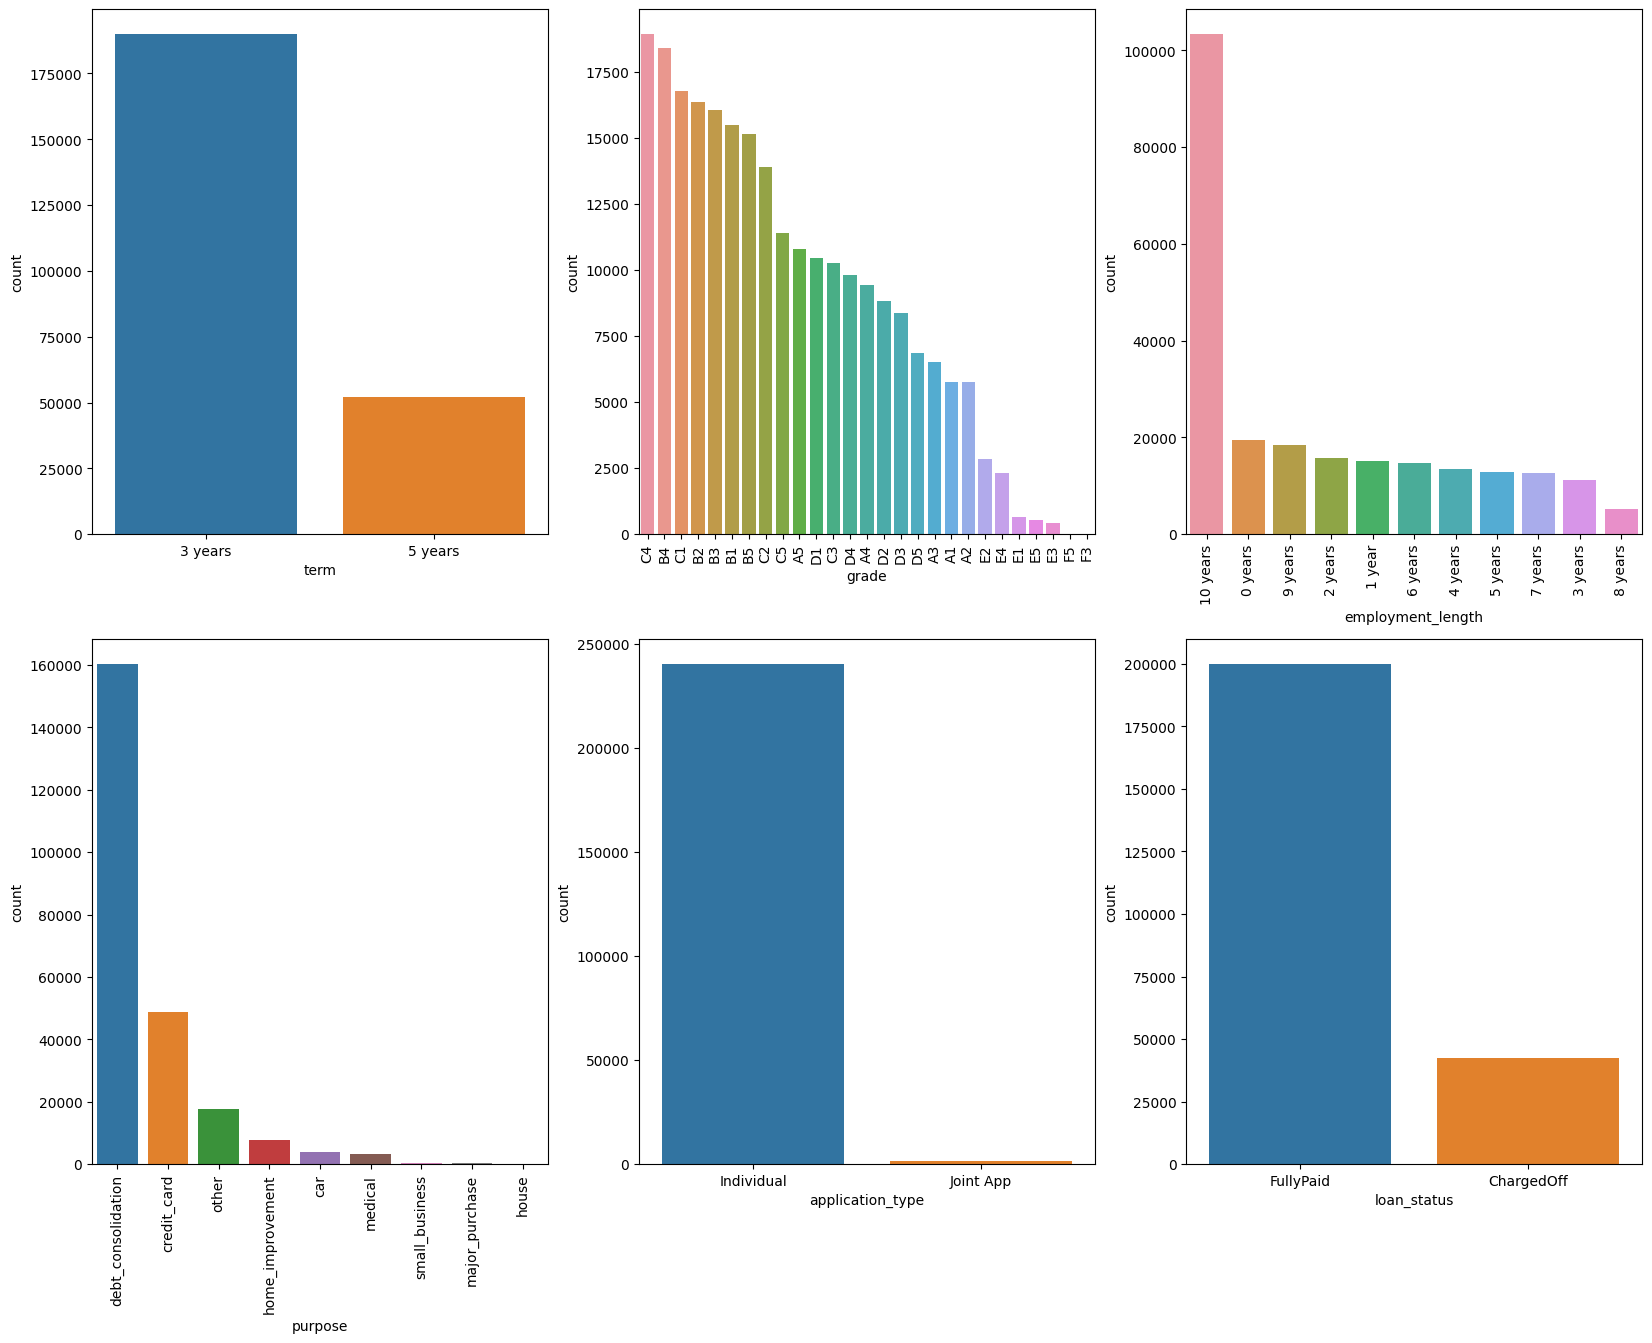

In [ ]:
fig , ax = plt.subplots(2 , 3 , figsize = (20 , 15))

sns.countplot(
    data = load_df[['term']] ,
    x = 'term' ,
    ax = ax[0 , 0]
)

sns.countplot(
    load_df[['grade']] ,
    x = 'grade',
    ax = ax[0,1],
    order=load_df['grade'].value_counts().index
)
ax[0,1].tick_params(axis='x',rotation=90)

sns.countplot(
    load_df[['employment_length']] ,
    x = 'employment_length',
    ax = ax[0,2],
    order=load_df['employment_length'].value_counts().index
)
ax[0, 2].tick_params(axis='x', rotation=90)

sns.countplot(
    load_df[['purpose']],
    x = 'purpose',
    ax = ax[1,0],
    order=load_df['purpose'].value_counts().index
)
ax[1,0].tick_params(axis='x', rotation=90)

sns.countplot(
    load_df[['application_type']],
    x = 'application_type',
    ax = ax[1,1]
)

sns.countplot(
    load_df[['loan_status']],
    x = 'loan_status',
    ax = ax[1,2]
)

### term(대출기간)
- 3년,5년의 두개밖에 없다.  
- 대출 목적에 집 짓는 것이 있는데 대출 기간이 최대 5년밖에 없는 것은 이상함.

### grade(신용 등급)
- A1~F5까지 있다.  
- c4 등급인 사람들이 많이 대출하고 있다.(대출자가 많다.)
- E~F의 등급은 거의 없다.
- F에 가까울수록 등급이 떨어지는데 이것은 신용이 없는 사람을 의미하고 F3,F5에 관해서는 확인하기가 어려울 정도로 적다.

### employment_length(근속연수)  
- 10년이상 하나의 회사를 다니고 그만한 사람이 가장 많다.
- 그 다음에 많은 것이 신입 회사원인 0year이다.

### purpose(대출 목적)     
-- debt_consolidaation(채무 정리)   
-- car(자동차)  
-- credit_card(신용 카드)  
-- home_improvement(주택 개선/개량)  
-- medical(의료)    
-- small_business(소규모 비즈니스)  
-- major_purchase(대규모 구매)  
-- house(집 짓기)  
-- other(기타)

- debt_consolidation(채무 정리)가 가장 높았다.
- debt_consolidation
-- 가계나 기업에서 지고 있는 채무를 한 군데로 묶는 것  
-- 여러 개의 빚이나 대출을 하나의 대출로 합치는 과정을 가리킨다.  
-- 이자 감소  
-- 관리 용이성  
-- 신용 개선


### application_type(신청했을 때의 사람 수)
- indivisual(개인)
- joint_app(두명이상의 신청)
- 압도적으로 개인으로 대출 신청하는 경우가 많지만 joint_app같은 경우 큰 프로젝트 등

### loan_status(변제 상태)
- 목적변수  
- 완전히 변제가 끝난 상태인 사람이 많다.  
- 갚지 못한 사람도 약 4만명 정도는 있다.
- ***불균형 데이터이기 때문에 학습할 때는 SMOTE를 사용해야 한다.***

### grade

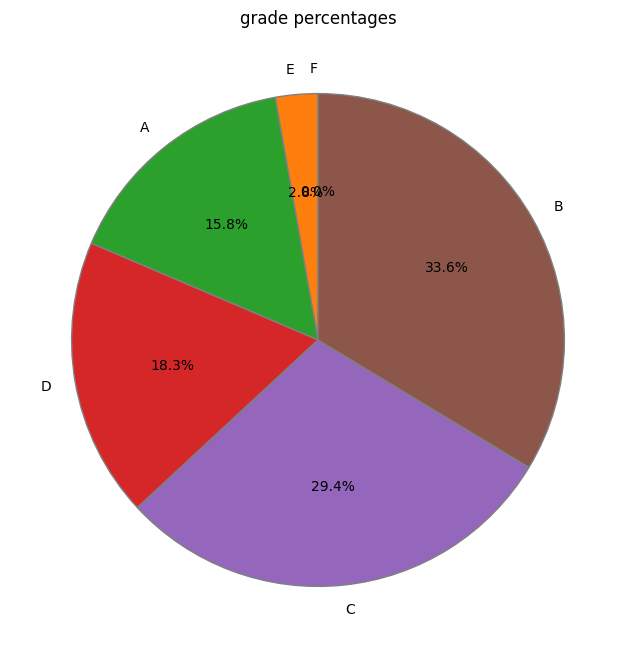

In [ ]:
# grade컬럼의 첫 문자만 추출한 요소를 새로운 데이터프레임에 추가한다.
new_df = pd.DataFrame()
new_df['grade'] = load_df['grade'].str[0]
# 등급별 개수를 세고 정렬한다.
grade_counts = new_df['grade'].value_counts().sort_values()

labels = grade_counts.index
values = grade_counts.values

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor': 'gray'})
plt.title('grade percentages')

plt.show()

- 등급별로 시각화한 결과 등급이 B인 사람이 가장 많았다.그 다음에 29.4%,18.3%로 C,B순서로 이어가고 네번째에 가장 높은 등급인 A가 등장한다.
- A등급은 전체의 15.8%정도를 차지하고 있다.

### loan_amnt

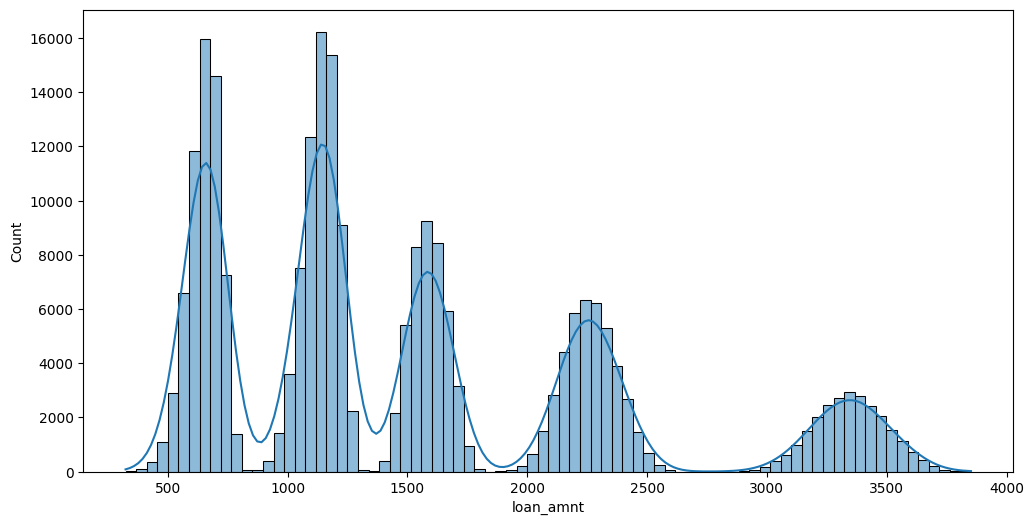

In [ ]:
loan_amnt = load_df['loan_amnt']
plt.figure(figsize=(12,6))
sns.histplot(loan_amnt, kde=True)
plt.show()

- 600~700
- 1100~1200
- 1500~1700
- 2200~2300
- 3300~3400
금액일때 많은 사람이 대출하고 있다.
그 이유로써 대출의 목적이 관계가 있다고 생각해본다.  
대출의 목적에 따라 금액도 달라지고 신용카드같은 경우는 주택에 비해 많이 돈을 필요로 하지 않으니까 차이가 생겼다고 생각함.  

그래서 목적별로 다시 대출금액을 시각화하고 확인해본다.

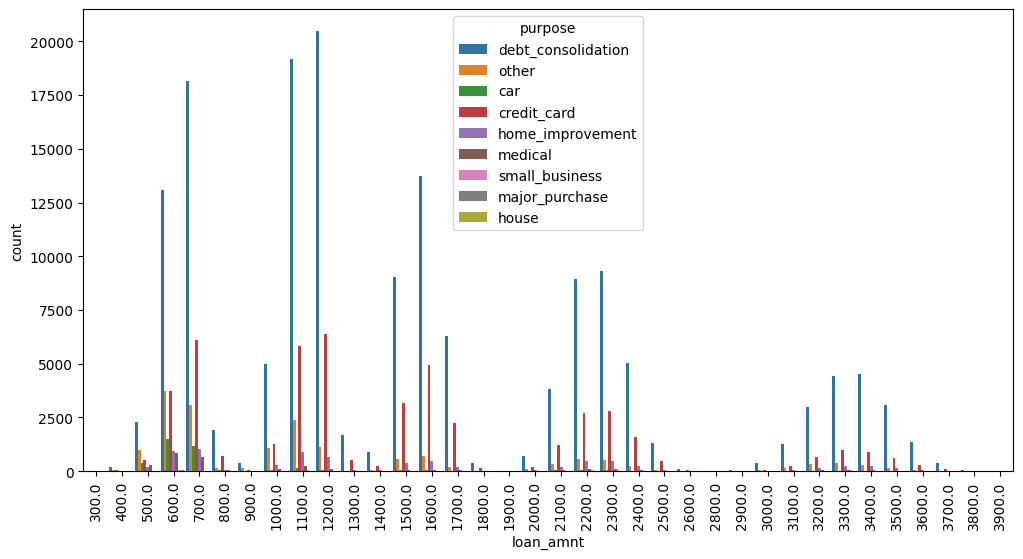

In [ ]:
new_df = pd.DataFrame()
new_df = load_df
new_df['loan_amnt'] = (new_df[['loan_amnt']] / 100).round() * 100
grouped_df = new_df.groupby(['loan_amnt','purpose'])['purpose'].count().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped_df,x='loan_amnt',y='count',hue='purpose',width=1.0)
plt.xticks(rotation=90)
plt.show()

- loan_amnt를 시각화했을때 신용카드를 만드는 것보다 자동차나 집을 짓는것이 더 큰 돈을 필요로 하니까 대출의 목적에 따라 금액도 달라진다고 생각했지만 사실은 그렇지 않았다. 신용카드를 만들거나 세무 정리는 규모가 커질수도 있으니 어느 대출 가격대에도 등장한 걸 알 수 있다.  

- 600~700대는 많은 목적이 존재한다.
- 어느 대출 금액도 세무 정리가 가장 많이 차지하고 있다.  
- major_purchase같은 목적은 전반에는 없고 후반에만 등장한다.  

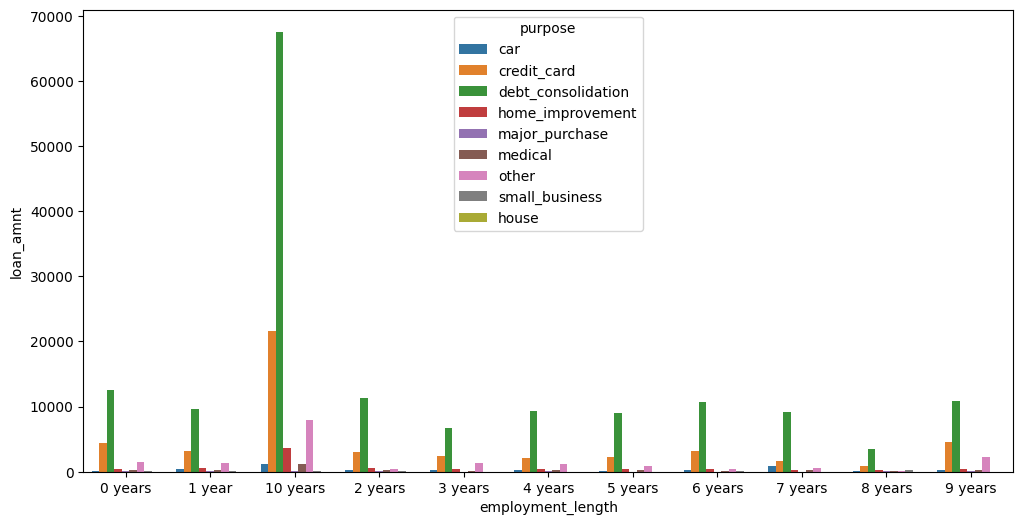

In [ ]:
#목적과 근속기간으로 그룹화하고 목적별 대출수를 시각화한다.
grouped = load_df.groupby(['employment_length','purpose'])['loan_amnt'].count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=grouped,x='employment_length',y='loan_amnt',hue='purpose')
plt.show()

- 10년 하나의 회사에서 계속 일하는 사람의 대출 목적에서 채무 정리가 제일 많다.

In [ ]:
load_df.groupby('purpose')['loan_amnt'].max()

purpose
car                   3672.707210
credit_card           3826.647920
debt_consolidation    3851.867974
home_improvement      3795.746285
house                 2236.248973
major_purchase        3659.672232
medical               3674.342608
other                 3755.603894
small_business        3683.247017
Name: loan_amnt, dtype: float64

- 신용 카드, 자동차, 집 짓기 등 대출 목적 별로 대출 금액의 큰 차이가 있어야 하는데 그 차이가 없다. ***(예를 들면 같은 4000이라는 숫자 하더라도 신용 카드는 4000천원, 자동차는 4000만원, 집 짓기는 4000십만원이 타당하게 생각된다.)***
- 생각되는 원인은 모든 대출 금액에 대해 미리 min-max-scaling을 했거나 대출 금액의 단위를 안 맟주고 수집해버린 경우가 생각된다.

### employment_length

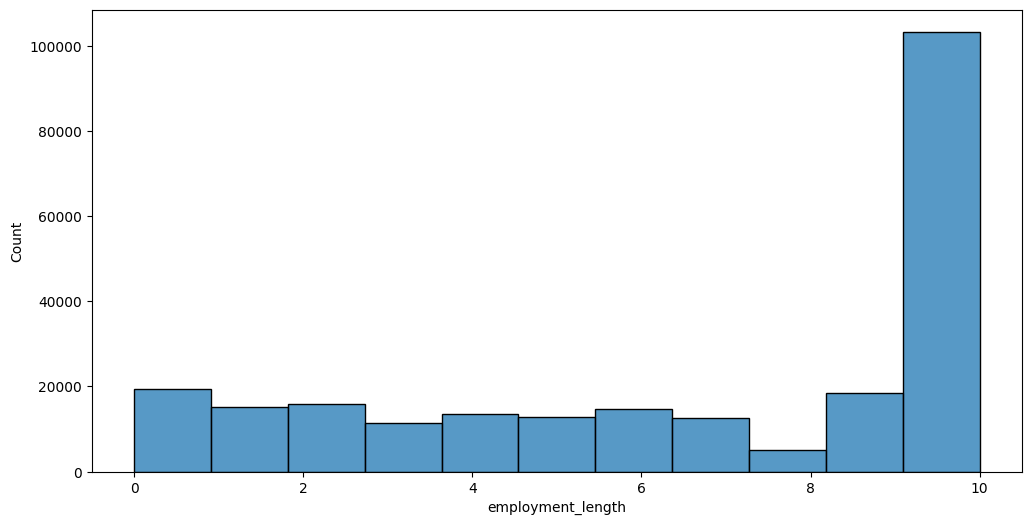

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=load_df,x=load_df['employment_length'],bins=11)
plt.savefig("/content/drive/MyDrive/smu/artificial /teamProject/DATA/employment_length.jpg")
plt.show()

- 근속 년수는 하나의 회사에서 계속 일하는 시간을 나타난 변수인데 10년에서 너무 집중하고 있다.   
- 그래프에 이상한 편향이 있는 이유는 아마 10년을 넘어 계속 일하고 있는 사람들도 10년으로 집계되었기 때문이라고 생각한다.

### interest_rate

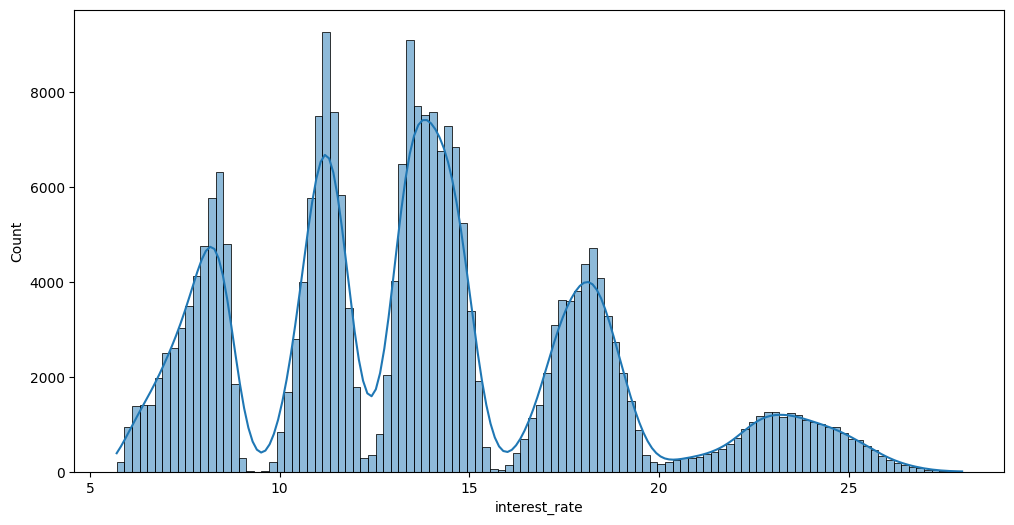

In [ ]:
#금리 시각화하기
interest_rate = load_df['interest_rate']
plt.figure(figsize=(12,6))
sns.histplot(interest_rate,kde=True)
plt.savefig("/content/drive/MyDrive/smu/artificial /teamProject/DATA/interest_rate.jpg")
plt.show()

- 금리는 대충 대출 금액과 비슷한 모습을 확인할 수 있다.

In [ ]:
load_df['interest_rate'].describe()

count    242150.000000
mean         13.801496
std           4.588924
min           5.704849
25%          10.876086
50%          13.543833
75%          17.172395
max          27.980604
Name: interest_rate, dtype: float64

- 금리를 보면 평균이 13.8%, 최대값이 28.0%로 되어 있다.
- 현대 일본 수준으로 봐도 이상하게 높은 수준이라고 볼 수 있다.  
- 이 데이터가 어떤 시대, 어떤 곳에서 수집된 데이터인지 모르겠다.  
- 현대 일본의 상한 금리를 돌파하고 있고 적어도 최근의 일본의 데이터가 아닌 것 같다.  
- 여러 시대나 지역에서 수집한 데이터를 결합한 데이터일 수도 있다.

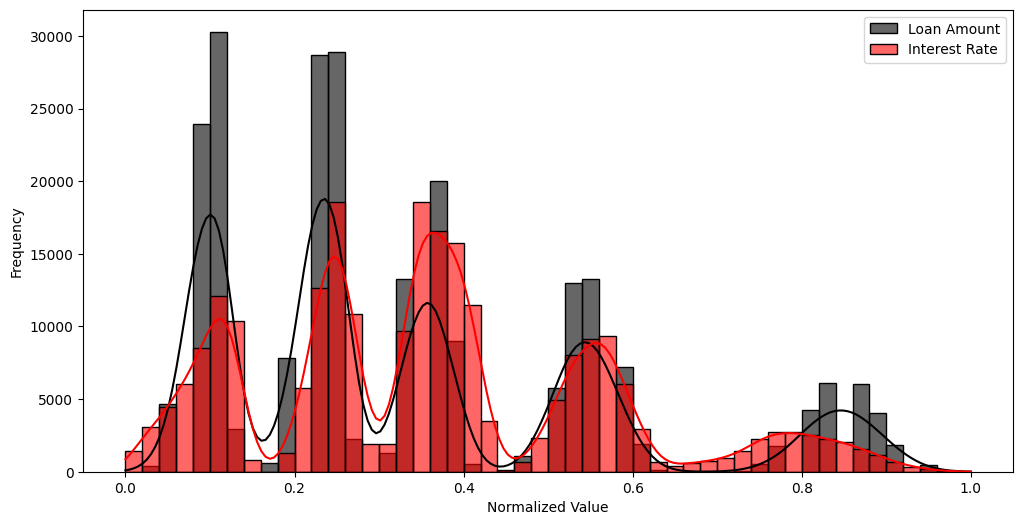

In [ ]:
x1 = load_df['loan_amnt']
x2 = load_df['interest_rate']

# Min-Max를 사용하여 스케일링한다.
scaler = MinMaxScaler()
x1_normalized = scaler.fit_transform(x1.values.reshape(-1, 1))
x2_normalized = scaler.fit_transform(x2.values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(x1_normalized, bins=50, alpha=0.6, color='black', kde=True, label='Loan Amount', palette=['black'])
sns.histplot(x2_normalized, bins=50, alpha=0.6, color='red', kde=True, label='Interest Rate', palette=['red'])

ax.set_xlabel('Normalized Value')
ax.set_ylabel('Frequency')
plt.legend()

plt.show()

## 이상값 확인

Text(0.5, 0, 'credit_score')

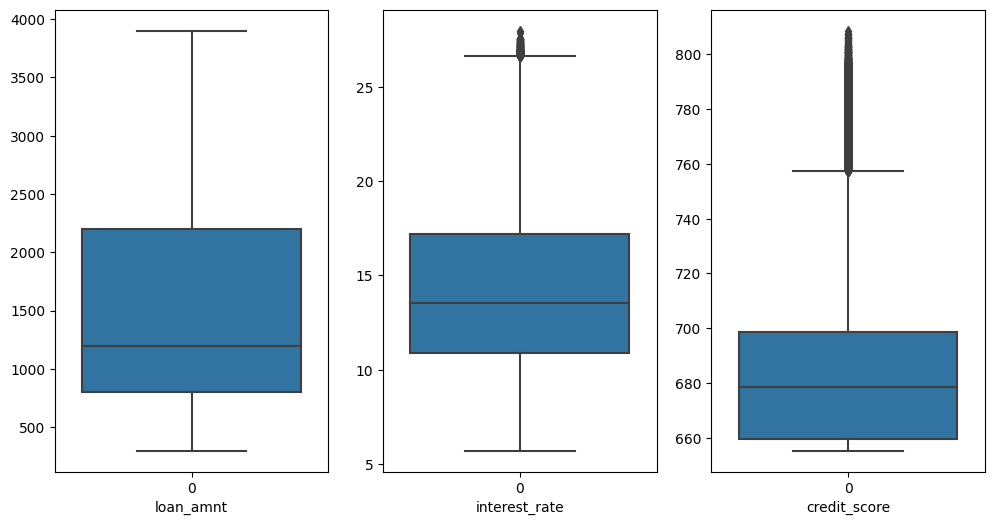

In [ ]:
fig , ax = plt.subplots(1 , 3 , figsize = (12,6))

sns.boxplot(
    load_df['loan_amnt'],
    ax = ax[0]
)
ax[0].set_xlabel('loan_amnt')

sns.boxplot(
    load_df['interest_rate'],
    ax = ax[1]
)
ax[1].set_xlabel('interest_rate')

sns.boxplot(
    load_df['credit_score'],
    ax = ax[2]
)
ax[2].set_xlabel('credit_score')

## 이상값에 관한 분석

### credit_score

In [ ]:
#시각화하여 알게 된 이상값들을 추출하여 분석해본다.
data = load_df.copy()

q1 = np.percentile(data['credit_score'] , 25)#Q1
q3 = np.percentile(data['credit_score'] , 75)#Q3

IQR = q3 - q1

upper_fence = q3 + (1.5 * IQR)
lower_fence = q1 - (1.5 * IQR)

outlier_df = data[(data['credit_score'] < lower_fence) | (data['credit_score'] > upper_fence)]
outlier_df.describe(include=['number'])

,id,loan_amnt,interest_rate,credit_score
count,10828.000000,10828.000000,10828.000000,10828.000000
mean,121655.299317,1568.978574,8.438129,779.806907
std,69948.075274,941.708745,2.864579,9.219268
min,25.000000,300.000000,5.704849,757.184710
25%,61877.750000,700.000000,6.644022,773.343213
50%,121961.000000,1200.000000,7.260049,781.462317
75%,182263.500000,2200.000000,10.082736,786.816298
max,242144.000000,3800.000000,26.199632,808.551641


In [ ]:
outlier_df.describe(include=['object'])

,term,grade,employment_length,purpose,application_type,loan_status
count,10828,10828,10828,10828,10828,10828
unique,2,23,11,7,2,2
top,3 years,A1,10 years,debt_consolidation,Individual,FullyPaid
freq,9358,3054,5240,6798,10670,10340


- credit_score의 이상값일 경우 신용의 스코어이기 때문에 무조건 나쁘다는 것이 아니다.  
- 대출 금액의 폭은 넓다.

<Axes: ylabel='Count'>

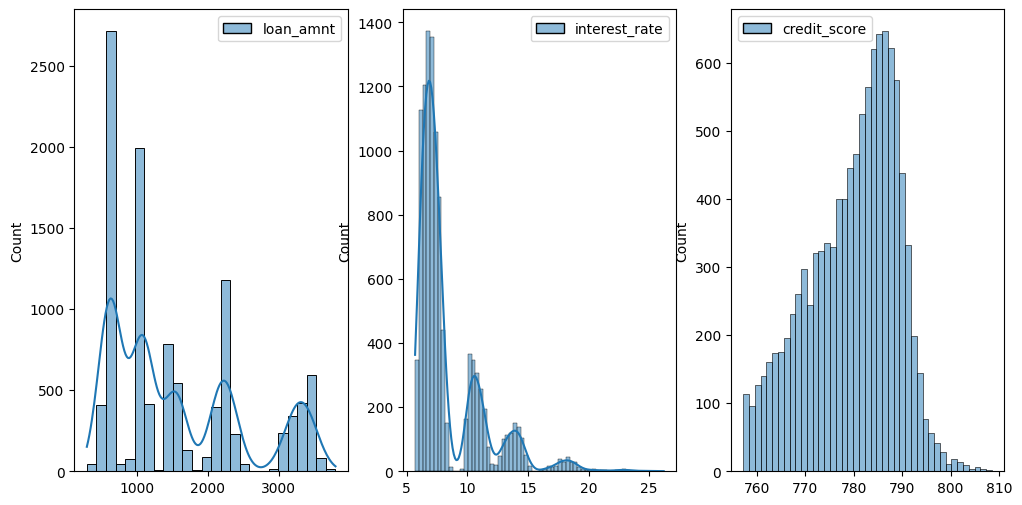

In [ ]:
fig , ax = plt.subplots(1 , 3 , figsize = (12 , 6))

sns.histplot(
    data = outlier_df[['loan_amnt']] ,
    kde = True,
    ax = ax[0]
)

sns.histplot(
    outlier_df[['interest_rate']] ,
    kde = True,
    ax = ax[1]
)

sns.histplot(
    outlier_df[['credit_score']] ,
    ax = ax[2]
)

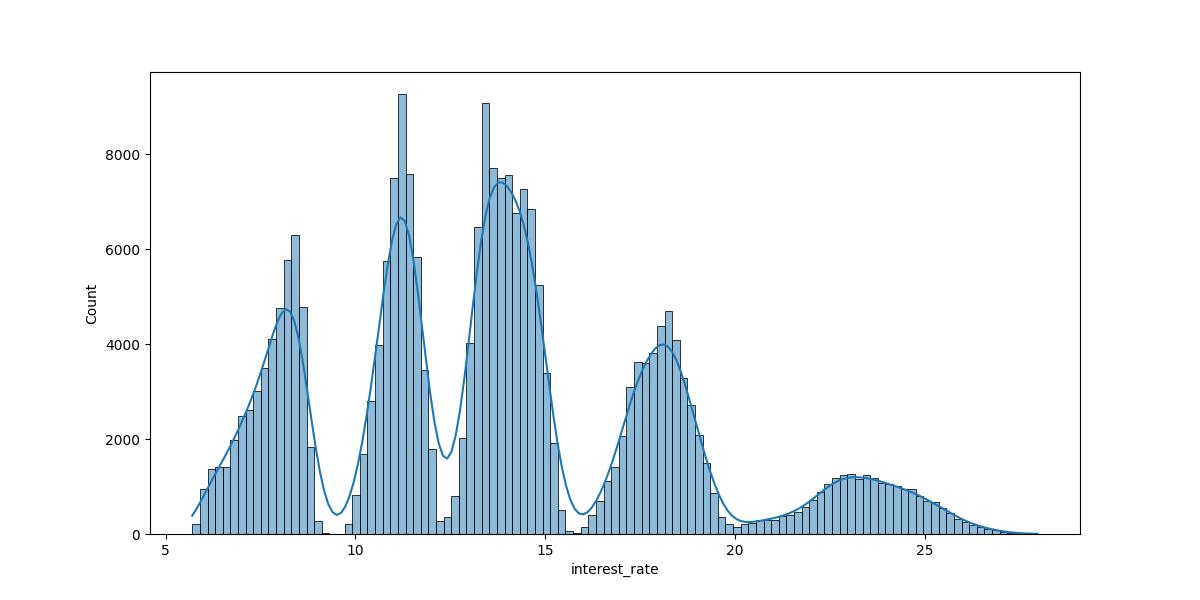

- credit_score에서 이상값을 가진 데이터들을 살펴봤을 때 loan_amnt에 관해서는 원래 데이터셋과 같은 분포를 가지고 있다.  
- 금리에 관해서는 금리가 낮은 사람의 대부분이 신용 스코어가 높은 사람들이다.  
- 위의 정보를 토대로 금리에 대해 조사해봤더니 신용 스코어가 높은 사람은 우선적으로 저금리로 대출할 수 있다는 걸 알게 되었다.
-- 부정적인 이유가 없어서 credit_score의 이상값은 삭제하지 않고 clipping한다.

### interest_rate

In [ ]:
#시각화하여 알게 된 이상값들을 추출하여 분석해본다.
data = load_df.copy()

q1 = np.percentile(data['interest_rate'] , 25)#Q1
q3 = np.percentile(data['interest_rate'] , 75)#Q3

IQR = q3 - q1

upper_fence = q3 + (1.5 * IQR)
lower_fence = q1 - (1.5 * IQR)

outlier_df = data[(data['interest_rate'] < lower_fence) | (data['interest_rate'] > upper_fence)]
outlier_df.describe(include=['number'])

,id,loan_amnt,interest_rate,credit_score
count,231.000000,231.000000,231.000000,231.000000
mean,114905.069264,2355.411255,26.923767,667.678137
std,67493.048447,831.945692,0.264037,13.071006
min,184.000000,500.000000,26.617446,656.339783
25%,59056.500000,1600.000000,26.713647,659.506306
50%,111398.000000,2300.000000,26.849446,662.013341
75%,162231.500000,3300.000000,27.082117,669.620037
max,239616.000000,3600.000000,27.980604,721.131426


In [ ]:
outlier_df.describe(include=['object'])

,term,grade,employment_length,purpose,application_type,loan_status
count,231,231,231,231,231,231
unique,2,19,11,8,2,2
top,5 years,A3,10 years,debt_consolidation,Individual,ChargedOff
freq,214,63,116,148,225,165


<Axes: ylabel='Count'>

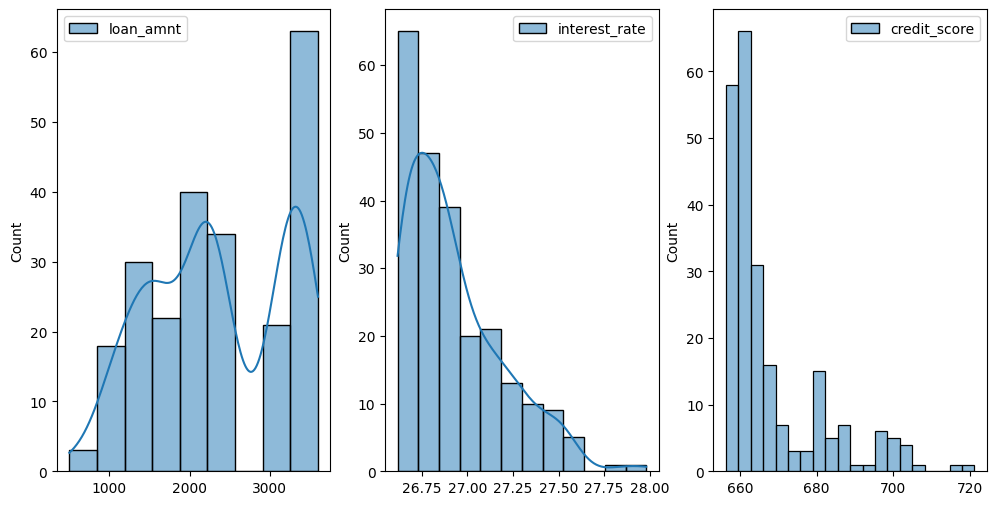

In [ ]:
fig , ax = plt.subplots(1 , 3 , figsize = (12 , 6))

sns.histplot(
    data = outlier_df[['loan_amnt']] ,
    kde = True,
    ax = ax[0]
)

sns.histplot(
    outlier_df[['interest_rate']] ,
    kde = True,
    ax = ax[1]
)

sns.histplot(
    outlier_df[['credit_score']] ,
    ax = ax[2]
)

## 상관관계

In [ ]:
correlation_matrix = new_df.select_dtypes(include=['number']).corr()
correlation_matrix

,id,loan_amnt,interest_rate,credit_score
id,1.000000,0.001548,-0.002235,0.001604
loan_amnt,0.001548,1.000000,0.210648,0.098323
interest_rate,-0.002235,0.210648,1.000000,-0.443101
credit_score,0.001604,0.098323,-0.443101,1.000000


In [ ]:
#object타입의 변수들을 추출하여 새로운 데이터프레임 작성
#new_df = load_df.select_dtypes(include=['object'])
new_df = load_df[['grade','purpose','term','application_type','loan_status']]

variables = new_df.columns

# 카이제검증을 통하여 변수간에 관계가 있는지 확인한다.
results = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        contingency_table = pd.crosstab(new_df[var1], new_df[var2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results.append((var1, var2, chi2, p))


for result in results:
    var1, var2, chi2, p = result
    print(f"Chi-squared test between {var1} and {var2}:")
    print(f"Chi-squared: {chi2}")
    print(f"P-value: {p}")
    print("----------")

Chi-squared test between grade and purpose:
Chi-squared: 10262.70024183911
P-value: 0.0
----------
Chi-squared test between grade and term:
Chi-squared: 41943.51988227431
P-value: 0.0
----------
Chi-squared test between grade and application_type:
Chi-squared: 476.94552053459813
P-value: 2.0130133254497362e-84
----------
Chi-squared test between grade and loan_status:
Chi-squared: 10839.010068643736
P-value: 0.0
----------
Chi-squared test between purpose and term:
Chi-squared: 1896.9978886095319
P-value: 0.0
----------
Chi-squared test between purpose and application_type:
Chi-squared: 71.43431556453265
P-value: 2.544920619271878e-12
----------
Chi-squared test between purpose and loan_status:
Chi-squared: 1113.4924688167687
P-value: 4.670307320683847e-235
----------
Chi-squared test between term and application_type:
Chi-squared: 121.71889112202774
P-value: 2.6597581784512088e-28
----------
Chi-squared test between term and loan_status:
Chi-squared: 6752.730194950465
P-value: 0.0
---

카이제곱검증을 이용하여 연속적이지 않은 변수 간에 관계가 있는지를 확인해본다.  

-- 예) 귀무가설H0 상환기간이 3년인지 5년인지하고 등급은 독립적이다.(관련이 없다)  
-- 예) 대립가설H1 상환기간이 3년인지 5년인지하고 등급은 독립적인지 않다.(관련이 있다)  

유의수준을 0.05로 설정하였을 때 어떤 변수간의 p값도 넘지 않고 서로 무언가의 관련이 있다는 걸 알 수 있다.



# 데이터 전처리

- 표준화
- SMOTE
- Encoding
- Clipping

#### clipping

- clipping이란 이상값인지 아니지의 경계선을 넘을 때 그 값을 경계선의 값으로 수정하는 기술

In [ ]:
def replace_outlier(series, bias=1.5):

    q1 = series.quantile(.25)#Q1
    q3 = series.quantile(.75)#Q3
    iqr = q3 - q1

    # 이상값의 기준
    outlier_min = q1 - (iqr) * bias
    outlier_max = q3 + (iqr) * bias

    print("outlier_min :" + str(outlier_min) + ", outlier_max :" + str(outlier_max))

    # clipping한다.
    series = series.clip(outlier_min, outlier_max)
    return series

In [ ]:
load_df['interest_rate'] = replace_outlier(load_df['interest_rate'])

outlier_min :1.431622447377972, outlier_max :26.616858578632783


In [ ]:
load_df['credit_score'] = replace_outlier(load_df['credit_score'])

outlier_min :600.9398238649475, outlier_max :757.183241937668


In [ ]:
# 이상값이 잘 수정되어 있는지 확인
load_df.describe(include=['number'])

,id,loan_amnt,interest_rate,credit_score
count,242150.00000,242150.000000,242150.000000,242150.000000
mean,121074.50000,1520.389009,13.801203,682.563382
std,69902.82818,830.250197,4.588089,26.397806
min,0.00000,323.797279,5.704849,655.424269
25%,60537.25000,761.954545,10.876086,659.531106
50%,121074.50000,1212.680586,13.543833,678.672563
75%,181611.75000,2152.213330,17.172395,698.591960
max,242149.00000,3851.867974,26.616859,757.183242


#### 표준화

In [ ]:
# 스케일러(표준화기)의 인스턴스 생성
scaler = StandardScaler()

# 표준화
load_df['loan_amnt'] = scaler.fit_transform(load_df[['loan_amnt']])
load_df['interest_rate'] = scaler.fit_transform(load_df[['interest_rate']])
load_df['credit_score'] = scaler.fit_transform(load_df[['credit_score']])

#### Encoding

In [ ]:
#원핫인코딩의 대상인 변수 추출한다
df = load_df[['purpose','application_type']]
pd_df = pd.get_dummies(df)
#pd_df

In [ ]:
#원래 데이터프레임에 원핫인코딩한 결과를 결합한다
load_df = pd.concat([load_df,pd_df],axis=1)

#인코딩 대상인 원래 컬럼을 삭제한다.
load_df = load_df.drop(['purpose','application_type'],axis=1)

In [ ]:
#순서에 의미가 있는 범주형 변수들을 라벨인코딩한다.
le = LabelEncoder()
load_df['term'] = le.fit_transform(load_df['term'])

In [ ]:
category_order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                  'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                  'E1', 'E2', 'E3', 'E4', 'E5', 'F3', 'F5']
load_df['grade'] = load_df['grade'].astype(
    pd.CategoricalDtype(categories=category_order, ordered=True)
)
load_df['grade'] = load_df['grade'].cat.codes

In [ ]:
label_mapping = {
    '0 years': '0',
    '1 year': '1',
    '2 years': '2',
    '3 years': '3',
    '4 years': '4',
    '5 years': '5',
    '6 years': '6',
    '7 years': '7',
    '8 years': '8',
    '9 years': '9',
    '10 years': '10'
}

load_df['employment_length'] = load_df['employment_length'].map(label_mapping)
load_df['employment_length'] = load_df['employment_length'].astype(int)

#### SMOTE

In [ ]:
# 데이터프레임을 SMOTE적응하기 위해 목적변수와 독립변수로 분할한다.
X = load_df.drop("loan_status", axis=1)
y = load_df["loan_status"]

In [ ]:
#목적변수가 불균형데이터이기 때문에 SMOTE해준다.
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

FullyPaid     199794
ChargedOff    199794
Name: loan_status, dtype: int64

In [ ]:
df = pd.concat([X_resampled, y_resampled], axis=1)

#### 목적변수를 0과 1로 변환한다.

In [ ]:
df['loan_status'] = df['loan_status'].map({'FullyPaid':0,'ChargedOff':1})

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,application_type_Individual,application_type_Joint App,loan_status
0,-1.097374,0,-1.172434,4,0,1.193224,0,0,1,0,0,0,0,0,0,1,0,0
1,-0.406050,1,-0.765991,5,10,0.573659,0,1,0,0,0,0,0,0,0,1,0,1
2,-0.993204,0,0.201004,11,1,-0.990388,0,0,1,0,0,0,0,0,0,1,0,0
3,-0.941882,0,0.100152,10,0,-0.934039,0,1,0,0,0,0,0,0,0,1,0,0
4,0.146958,1,2.488241,24,10,-0.742150,0,0,1,0,0,0,0,0,0,1,0,0


#### 데이터 분할

In [ ]:
df.shape

(399588, 18)

In [ ]:
#데이터프레임을 목적변수와 독립변수로 분할한다.
X = df.drop(['loan_status'],axis=1)
y = df[['loan_status']]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

# 모델 학습

### 모델을 만드는 목적이 채무 불이행인지 아닌지를 판단하는 것이기 때문에 이항분류 모델을 사용한다.

- Logistic Regression  
- 다층 퍼셉트론

- 이용한 평가방법은 f1score  
- recall이란 실제로 채무 불이행인 사람 중에서 채무 불이행이라고 잘 분류된 사람의 비율  
- precision이란 채무 불이행이라고 분류한 사람 중에서 실제로 채무 불이행한 사람의 비율  
- ***f1score를 평가방법으로써 선정한 이유는 금융 분야에서는 recall가 좋아지면 채무 불이행할 사람에게 돈을 대출할 필요가 없어져서 수익이 개선된다. 또한 은행 같은 금융 기관은 공적인 기관이라는 입장도 가지고 있고 돈을 필요로 하는 사람들에 가능한한 돈을 빌려주고 경제를 원활히 돌려나갈 사명이 있다.(원래 자본주의는 대출(신용)으로 돌아가고 있다.). precision이 개선되면 돈을 필요로 하는 혹은 돈을 대출해야 하는 사람에게 돈을 대출할 수 있다.***  
- recall도 precision도 금융분야에서는 너무 중요한 지표이기 떄문에 이번에는 두개의 조화평균으로 계산되는 f1score가 평가지표로 선정하였다.

### 로지스틱 회귀

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

#print("Train Data Accuracy=" , model2.score(X_train,y_train))
#print("Test Data Accuracy=" , model2.score(X_test,y_test))

In [ ]:
print(classification_report(y_train , model2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77    139887
           1       0.81      0.66      0.73    139824

    accuracy                           0.75    279711
   macro avg       0.76      0.75      0.75    279711
weighted avg       0.76      0.75      0.75    279711



混同行列:
[[50252  9655]
 [20389 39581]]


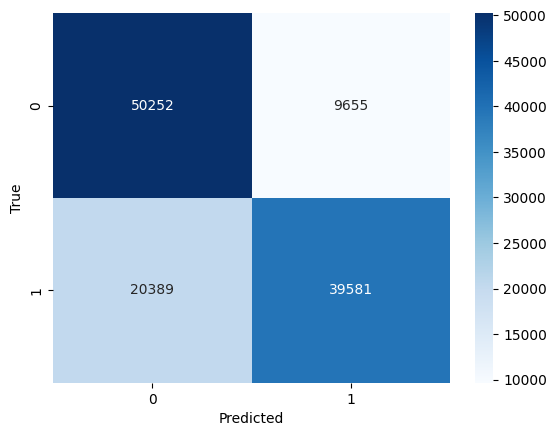

In [ ]:
y_pred = model2.predict(X_test)

# 예측 결과를 0.5로 binary화 한다.
y_pred_binary = (y_pred > 0.5).astype(int)

confusion = confusion_matrix(y_test, y_pred_binary)

print("混同行列:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- 실제로는 채무 불이행인 사람에 대해 변제가 끝났다고 잘 못 분류한 케이스가 20000개 정도 있다.

### 다층 퍼셉트론

In [ ]:
X = df.drop(['loan_status'],axis=1)
y = df[['loan_status']]

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


# 신경망 구조 설정
n_input=17
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_hidden5=512
n_output=1#sigmoid함수를 마지막 층에서 사용하고 있으니까 1로 설정

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='relu',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='relu',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='relu',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden5,activation='relu',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='sigmoid',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['binary_accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

y_pred = mlp.predict(x_test)
y_pred_binary = np.round(y_pred)

# f1score 계산
f1 = f1_score(y_test, y_pred_binary)


# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
2498/2498 - 134s - loss: 0.4558 - binary_accuracy: 0.7618 - val_loss: 0.4374 - val_binary_accuracy: 0.7747 - 134s/epoch - 54ms/step
Epoch 2/30
2498/2498 - 132s - loss: 0.4379 - binary_accuracy: 0.7765 - val_loss: 0.4337 - val_binary_accuracy: 0.7793 - 132s/epoch - 53ms/step
Epoch 3/30
2498/2498 - 131s - loss: 0.4259 - binary_accuracy: 0.7850 - val_loss: 0.4142 - val_binary_accuracy: 0.7931 - 131s/epoch - 52ms/step
Epoch 4/30
2498/2498 - 131s - loss: 0.4139 - binary_accuracy: 0.7954 - val_loss: 0.4141 - val_binary_accuracy: 0.7963 - 131s/epoch - 53ms/step
Epoch 5/30
2498/2498 - 132s - loss: 0.4053 - binary_accuracy: 0.8015 - val_loss: 0.4006 - val_binary_accuracy: 0.8039 - 132s/epoch - 53ms/step
Epoch 6/30
2498/2498 - 132s - loss: 0.3999 - binary_accuracy: 0.8056 - val_loss: 0.4022 - val_binary_accuracy: 0.8022 - 132s/epoch - 53ms/step
Epoch 7/30
2498/2498 - 128s - loss: 0.3963 - binary_accuracy: 0.8075 - val_loss: 0.3977 - val_binary_accuracy: 0.8064 - 128s/epoch - 51ms/step

In [ ]:
print(f1)

0.8147756138865369


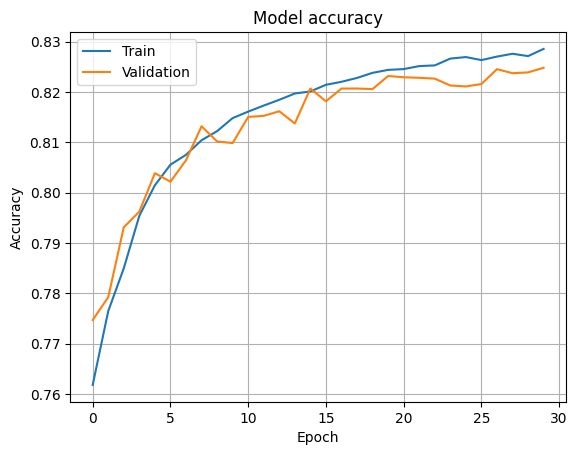

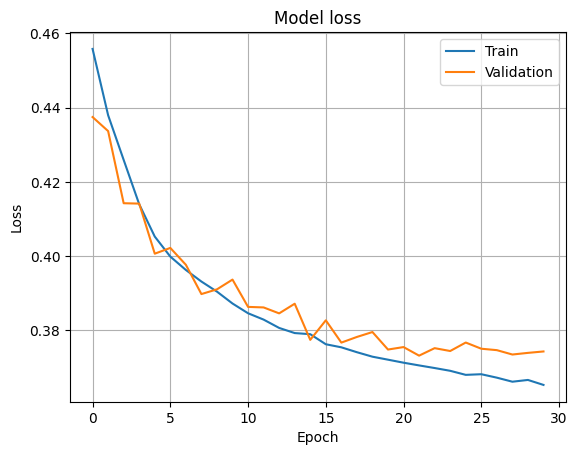

In [ ]:
# 정확률 곡선
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

- 과적합이 일어나지 않았다.

2498/2498 [==============================] - 18s 7ms/step
混同行列:
[[35126  4633]
 [ 9367 30792]]


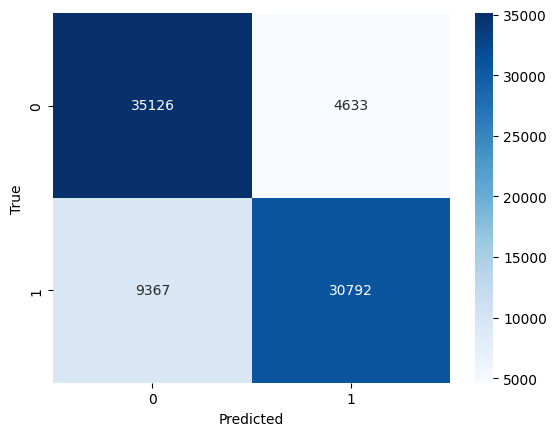

In [ ]:
y_pred = mlp.predict(x_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# 혼동행렬을 계산
confusion = confusion_matrix(y_test, y_pred_binary)

print("混同行列:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- 로지스틱 회귀보다 잘 못 분류한 수가 줄어졌다.  
